# Python for Data Analysis - Project

### Loading data

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv", sep = ',')

In [3]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### Converting Age column to 'int' type values

In [4]:
dataset.Age = dataset.Age.astype(int)
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# 1/-  Visualization

## A)° - Libraries

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

### Comparing average men's and women's weights

In [7]:
data_gen_wei = dataset.groupby("Gender").Weight.mean().sort_values()
data_gen_wei

Gender
Female    82.302364
Male      90.769478
Name: Weight, dtype: float64

Text(0.5, 1.0, 'average weight per gender')

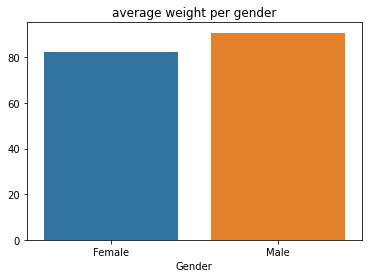

In [8]:
sns.barplot(x = data_gen_wei.index, y = data_gen_wei.values).set_title("average weight per gender")

### Comparing average weights per obesity type

In [9]:
data_tar_wei = dataset.groupby("NObeyesdad").Weight.mean().sort_values()
data_tar_wei

NObeyesdad
Insufficient_Weight     49.906330
Normal_Weight           62.155052
Overweight_Level_I      74.266828
Overweight_Level_II     82.085271
Obesity_Type_I          92.870198
Obesity_Type_II        115.305311
Obesity_Type_III       120.941114
Name: Weight, dtype: float64

Text(0.5, 1.0, 'average weight per Obesity type')

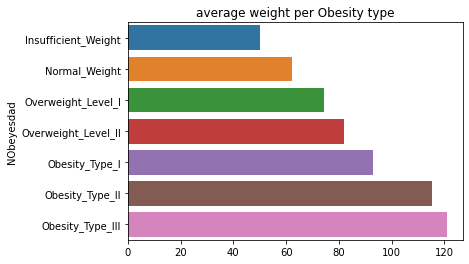

In [10]:
sns.barplot(y = data_tar_wei.index, x = data_tar_wei.values).set_title("average weight per Obesity type")

### Graph TUE = f(Age)

In [11]:
data_tue_age = dataset.groupby("TUE").Age.mean().sort_values()
data_tue_age

TUE
1.550110    16.0
1.765321    16.0
1.273333    16.0
0.956204    16.0
1.256119    16.0
            ... 
0.213437    40.0
0.360193    40.0
0.522259    40.0
1.103349    41.0
1.481890    42.0
Name: Age, Length: 1129, dtype: float64

Text(0.5, 1.0, 'average TUE per Age')

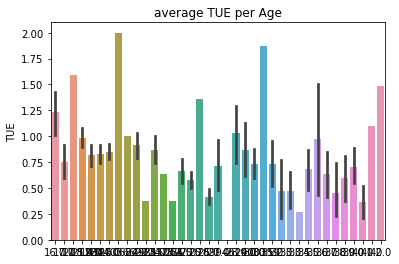

In [12]:
sns.barplot(y = data_tue_age.index, x = data_tue_age.values).set_title("average TUE per Age")

### Average Age per obesity type

In [13]:
data_tar_age = dataset.groupby("NObeyesdad").Age.mean().sort_values()
data_tar_age

NObeyesdad
Insufficient_Weight    19.433824
Normal_Weight          21.738676
Obesity_Type_III       23.052469
Overweight_Level_I     23.075862
Obesity_Type_I         25.504274
Overweight_Level_II    26.641379
Obesity_Type_II        27.750842
Name: Age, dtype: float64

Text(0.5, 1.0, 'average age per Obesity type')

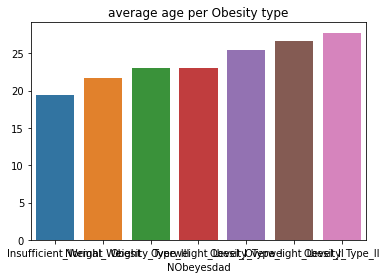

In [14]:
sns.barplot(y = data_tar_age.values, x = data_tar_age.index).set_title("average age per Obesity type")

### Average Weight per transportation way

In [15]:
data_trn_wei = dataset.groupby("MTRANS").Weight.mean().sort_values()
data_trn_wei

MTRANS
Walking                  70.596108
Motorbike                73.090909
Bike                     76.714286
Automobile               85.907619
Public_Transportation    87.486712
Name: Weight, dtype: float64

Text(0.5, 1.0, 'Average weight per transportation way')

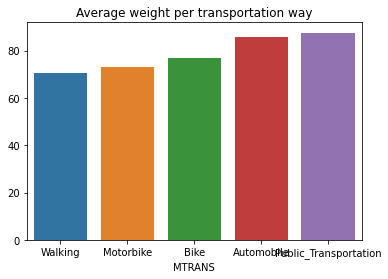

In [16]:
sns.barplot(y = data_trn_wei.values, x = data_trn_wei.index).set_title("Average weight per transportation way")

### Average Weight per smoking state

In [17]:
data_smk_wei = dataset.groupby("SMOKE").Weight.mean().sort_values()
data_smk_wei

SMOKE
no     86.487697
yes    91.206810
Name: Weight, dtype: float64

Text(0.5, 1.0, 'Average weight per smoking state')

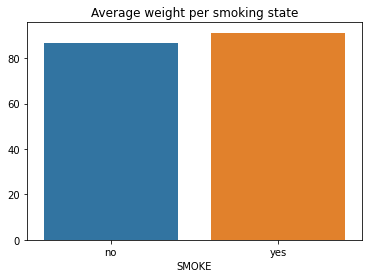

In [18]:
sns.barplot(y = data_smk_wei.values, x = data_smk_wei.index).set_title("Average weight per smoking state")

### Distribution of obesity types

In [19]:
data_nob_val = dataset.NObeyesdad.value_counts()
data_nob_val

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

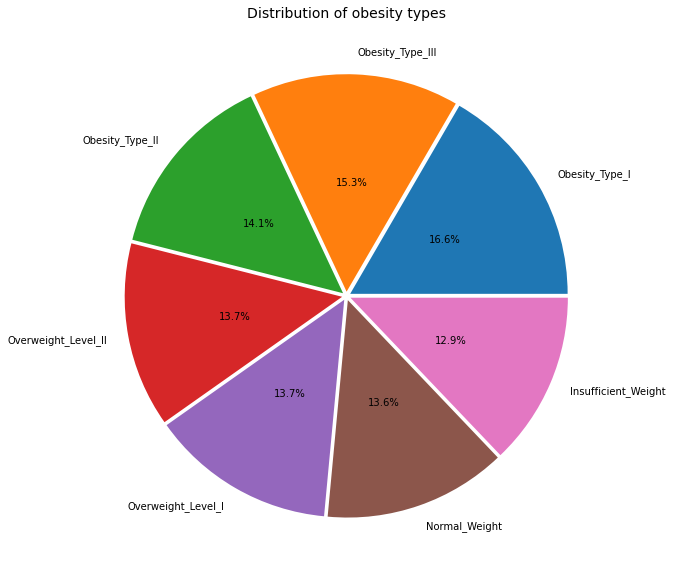

In [20]:
pie, ax = plt.subplots(figsize=[10,10])
labels = data_nob_val.keys()
plt.pie(x=data_nob_val, autopct="%.1f%%", explode=[0.02]*7, labels=labels, pctdistance=0.5)
plt.title("Distribution of obesity types", fontsize=14);

## B)° - Dataset conversion 

In [21]:
dataset.NObeyesdad.value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [22]:
dataset.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

### Gender

In [23]:
dataset.Gender.value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

In [24]:
dataset.Gender = dataset.Gender.map({'Male' : 1, 'Female' : 2})
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Family history with overweight

In [25]:
dataset.family_history_with_overweight.value_counts()

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

In [26]:
dataset.family_history_with_overweight = dataset.family_history_with_overweight.map({'yes' : 1, 'no' : 0})
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.62,64.0,1,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2,21,1.52,56.0,1,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.80,77.0,1,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.80,87.0,0,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22,1.78,89.8,0,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### FAVC

In [27]:
dataset.FAVC.value_counts()

yes    1866
no      245
Name: FAVC, dtype: int64

In [28]:
dataset.FAVC = dataset.FAVC.map({'yes' : 1, 'no' : 0})
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.62,64.0,1,0,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2,21,1.52,56.0,1,0,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.80,77.0,1,0,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.80,87.0,0,0,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22,1.78,89.8,0,0,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### CAEC

In [29]:
dataset.CAEC.value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

In [30]:
dataset.CAEC = dataset.CAEC.map({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3})
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.62,64.0,1,0,2.0,3.0,1,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2,21,1.52,56.0,1,0,3.0,3.0,1,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.80,77.0,1,0,2.0,3.0,1,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.80,87.0,0,0,3.0,3.0,1,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22,1.78,89.8,0,0,2.0,1.0,1,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### SMOKE

In [31]:
dataset.SMOKE.value_counts()

no     2067
yes      44
Name: SMOKE, dtype: int64

In [32]:
dataset.SMOKE = dataset.SMOKE.map({'yes' : 1, 'no' : 0})
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.62,64.0,1,0,2.0,3.0,1,0,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2,21,1.52,56.0,1,0,3.0,3.0,1,1,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.80,77.0,1,0,2.0,3.0,1,0,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.80,87.0,0,0,3.0,3.0,1,0,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22,1.78,89.8,0,0,2.0,1.0,1,0,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### CALC

In [33]:
dataset.CALC.value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

In [34]:
dataset.CALC = dataset.CALC.map({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3})
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.62,64.0,1,0,2.0,3.0,1,0,2.0,no,0.0,1.0,0,Public_Transportation,Normal_Weight
1,2,21,1.52,56.0,1,0,3.0,3.0,1,1,3.0,yes,3.0,0.0,1,Public_Transportation,Normal_Weight
2,1,23,1.80,77.0,1,0,2.0,3.0,1,0,2.0,no,2.0,1.0,2,Public_Transportation,Normal_Weight
3,1,27,1.80,87.0,0,0,3.0,3.0,1,0,2.0,no,2.0,0.0,2,Walking,Overweight_Level_I
4,1,22,1.78,89.8,0,0,2.0,1.0,1,0,2.0,no,0.0,0.0,1,Public_Transportation,Overweight_Level_II


### SCC

In [35]:
dataset.SCC.value_counts()

no     2015
yes      96
Name: SCC, dtype: int64

In [36]:
dataset.SCC = dataset.SCC.map({'yes' : 1, 'no' : 0})
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,Normal_Weight
1,2,21,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,Normal_Weight
2,1,23,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,Normal_Weight
3,1,27,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,Overweight_Level_I
4,1,22,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,Overweight_Level_II


### MTRANS

In [37]:
dataset.MTRANS.value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [38]:
dataset.MTRANS = dataset.MTRANS.map({'Public_Transportation' : 0, 'Automobile' : 1, 'Walking' : 2, 'Motorbike' : 3, 'Bike' : 4})
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,Normal_Weight
1,2,21,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,Normal_Weight
2,1,23,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,Normal_Weight
3,1,27,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2,Overweight_Level_I
4,1,22,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,Overweight_Level_II


## C)° - Plots

##### Gender impact on Obesity

Text(0, 0.5, 'Obesity Rate')

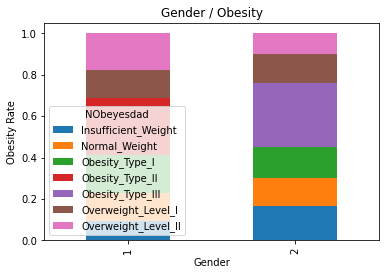

In [39]:
table = pd.crosstab(dataset.Gender,dataset.NObeyesdad)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title("Gender / Obesity")
plt.xlabel("Gender")
plt.ylabel("Obesity Rate")

##### Age impact on Obesity

Text(0, 0.5, 'Obesity Rate')

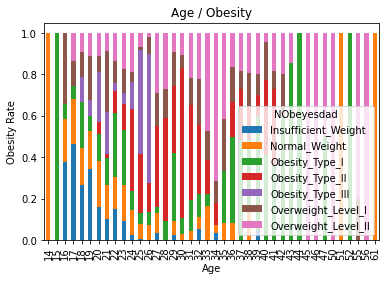

In [40]:
table = pd.crosstab(dataset.Age,dataset.NObeyesdad)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title("Age / Obesity")
plt.xlabel("Age")
plt.ylabel("Obesity Rate")

##### Smoking impact on Obesity

Text(0, 0.5, 'Obesity Rate')

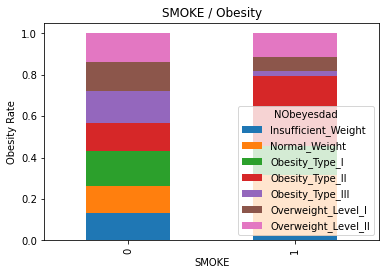

In [41]:
table = pd.crosstab(dataset.SMOKE,dataset.NObeyesdad)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title("SMOKE / Obesity")
plt.xlabel("SMOKE")
plt.ylabel("Obesity Rate")

##### The impact of family history with overweight on Obesity

Text(0, 0.5, 'Obesity Rate')

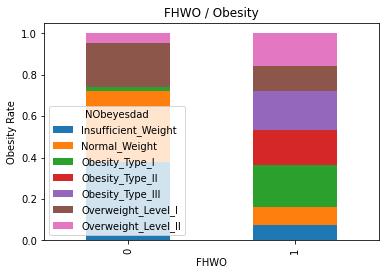

In [42]:
table = pd.crosstab(dataset.family_history_with_overweight,dataset.NObeyesdad)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title("FHWO / Obesity")
plt.xlabel("FHWO")
plt.ylabel("Obesity Rate")

##### FAVC impact on Obesity

Text(0, 0.5, 'Obesity Rate')

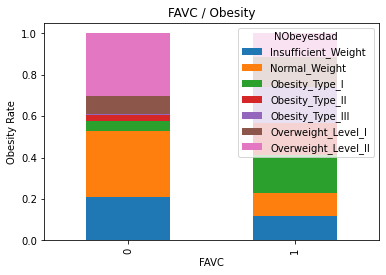

In [43]:
table = pd.crosstab(dataset.FAVC,dataset.NObeyesdad)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title("FAVC / Obesity")
plt.xlabel("FAVC")
plt.ylabel("Obesity Rate")

##### CAEC impact on Obesity

Text(0, 0.5, 'Obesity Rate')

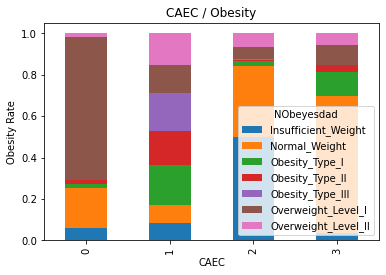

In [44]:
table = pd.crosstab(dataset.CAEC,dataset.NObeyesdad)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title("CAEC / Obesity")
plt.xlabel("CAEC")
plt.ylabel("Obesity Rate")

##### SCC impact on Obesity

Text(0, 0.5, 'Obesity Rate')

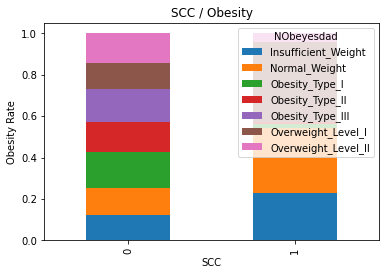

In [45]:
table = pd.crosstab(dataset.SCC,dataset.NObeyesdad)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title("SCC / Obesity")
plt.xlabel("SCC")
plt.ylabel("Obesity Rate")

##### CALC impact on Obesity

Text(0, 0.5, 'Obesity Rate')

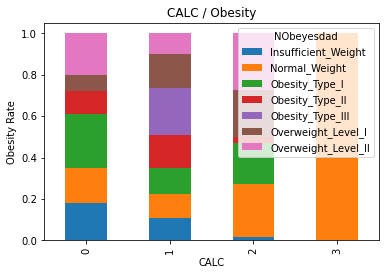

In [46]:
table = pd.crosstab(dataset.CALC,dataset.NObeyesdad)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title("CALC / Obesity")
plt.xlabel("CALC")
plt.ylabel("Obesity Rate")

##### MTRANS impact on Obesity

Text(0, 0.5, 'Obesity Rate')

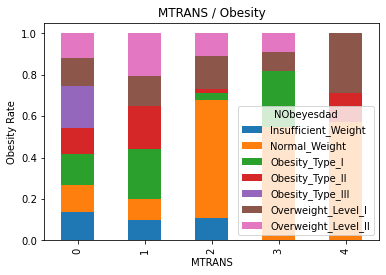

In [47]:
table = pd.crosstab(dataset.MTRANS,dataset.NObeyesdad)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title("MTRANS / Obesity")
plt.xlabel("MTRANS")
plt.ylabel("Obesity Rate")

## RECAP

**TESTED     :**  Gender, Age, FHWO, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS  <br><br>
**NOT TESTED :**  TUE, FAF, CH2O, NCP, FCVC, Weight, Height (unreadable plots)

### 

# Prediction

#### A)°- Importing the dataset and all the needed libraries:

In [49]:
dataset.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [50]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,Normal_Weight
1,2,21,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,Normal_Weight
2,1,23,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,Normal_Weight
3,1,27,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,2,Overweight_Level_I
4,1,22,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2,20,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,Obesity_Type_III
2107,2,21,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,Obesity_Type_III
2108,2,22,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,Obesity_Type_III
2109,2,24,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,Obesity_Type_III


In [51]:
dataset[dataset.Gender.notna()].select_dtypes('object')

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

## Converted dataset

In [93]:
data = pd.read_csv("Obesity dataset converted.csv", sep = ';')
data.drop(columns = 'Unnamed: 0', inplace = True)
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,Normal_Weight
1,2,21,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,Normal_Weight
2,1,23,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,Normal_Weight
3,1,27,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,2,Overweight_Level_I
4,1,22,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2,20,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,Obesity_Type_III
2107,2,21,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,Obesity_Type_III
2108,2,22,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,Obesity_Type_III
2109,2,24,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,Obesity_Type_III


#### Defining dependant (y) and independant (x) variables

In [94]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [95]:
# Splitting data into train and test sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
# Log Reg model
classifier = LogisticRegression(solver = 'newton-cg', random_state = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.score(X_test,y_test)

0.8296529968454258

### Random Forest

In [98]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [99]:
# Random Forest model
classifier2 = RandomForestClassifier(n_estimators = 100, random_state = 5)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)
classifier2.score(X_test,y_test)

0.9416403785488959

### SVM

In [100]:
from sklearn.svm import SVC

In [101]:
classifier3 = SVC(random_state = 5)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)
classifier3.score(X_test,y_test)

0.5630914826498423

### Bagging

In [102]:
from sklearn.ensemble import BaggingClassifier

In [103]:
classifier4 = BaggingClassifier(random_state = 5)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)
classifier4.score(X_test,y_test)

0.917981072555205

### Boosting

#### AdaBoost

In [104]:
from sklearn.ensemble import AdaBoostClassifier

In [105]:
classifier5 = AdaBoostClassifier(n_estimators=100, random_state = 5)
classifier5.fit(X_train, y_train)
y_pred5 = classifier5.predict(X_test)
classifier5.score(X_test,y_test)

0.2586750788643533

#### Stochastic Gradient Boosting

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
classifier6 = GradientBoostingClassifier(n_estimators=100, random_state = 5)
classifier6.fit(X_train, y_train)
y_pred6 = classifier6.predict(X_test)
classifier6.score(X_test,y_test)

0.9684542586750788

### Extra Trees

In [108]:
from sklearn.ensemble import ExtraTreesClassifier

In [109]:
classifier7 = ExtraTreesClassifier(n_estimators=100, random_state = 5)
classifier7.fit(X_train, y_train)
y_pred7 = classifier7.predict(X_test)
classifier7.score(X_test,y_test)

0.9258675078864353

## Models comparison

In [110]:
all_models = [classifier,
              classifier2,
              classifier3,
              classifier4,
              classifier5,
              classifier6,
              classifier7]

models_names = ["Logistic Regression",
                "Random Forest",
                "SVM",
                "Bagging",
                "AdaBoosting",
                "Stochastic Gradient Boosting",
                "Extra Trees"]

In [111]:
dico = {"Model" : [],
        "Score" : []}

for i in range(len(all_models)):
    dico["Model"] += [models_names[i]]
    dico["Score"] += [all_models[i].score(X_test,y_test)]

pd.DataFrame.from_dict(dico)

,Model,Score
0,Logistic Regression,0.829653
1,Random Forest,0.941640
2,SVM,0.563091
3,Bagging,0.917981
4,AdaBoosting,0.258675
5,Stochastic Gradient Boosting,0.968454
6,Extra Trees,0.925868


In [112]:
scores = list(dico.values())[1]
models = list(dico.values())[0]
top_score = 0

for i in range(len(scores)):
    if scores[i] > top_score:
        top_score = scores[i]
        top_model = models[i]
        
print("The best model is the '" + top_model + "' model with an accuracy of " + str(np.round(100*top_score,4)) + "%")

The best model is the 'Stochastic Gradient Boosting' model with an accuracy of 96.8454%


## Pickle

In [83]:
# export pickle files

import pickle

pickle.dump(classifier6, open('pickle files/my_preds.pickle','wb'))